In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv(r'C:\Users\USER\Downloads\Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')



# Preview datasets
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [38]:
# Checking for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Dropping rows with missing values (optional)
customers.dropna(inplace=True)
products.dropna(inplace=True)
transactions.dropna(inplace=True)

# Checking for duplicate entries
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())

# Dropping duplicates (if any)
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
0
0
0


In [39]:
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [40]:
# Data types and basic statistics
print("\nCustomers Info:")
print(customers.info())
print("\nProducts Info:")
print(products.info())
print("\nTransactions Info:")
print(transactions.info())


Customers Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 7.8+ KB
None

Products Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.9+ KB
None

Transactions Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Nul

In [41]:
# Basic statistics
print("\nTransactions Summary Statistics:")
print(transactions.describe())


Transactions Summary Statistics:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


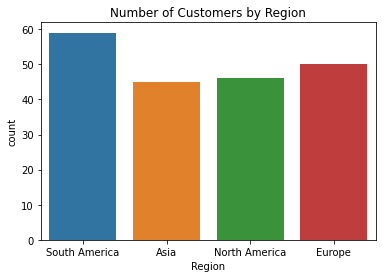

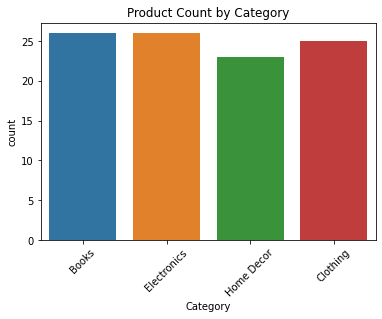

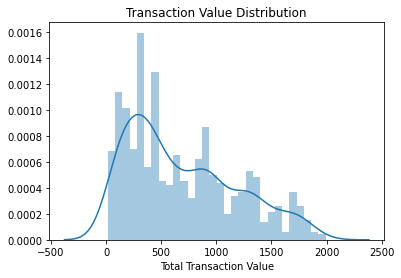

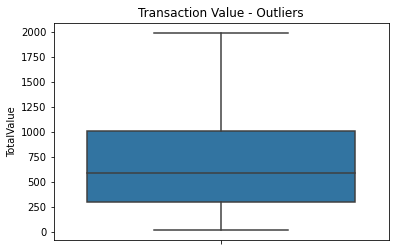

In [42]:
# Categorical Features
sns.countplot(data=customers, x='Region')
plt.title('Number of Customers by Region')
plt.show()

sns.countplot(data=products, x='Category')
plt.title('Product Count by Category')
plt.xticks(rotation=45)
plt.show()

# Numerical Features
sns.distplot(transactions['TotalValue'], kde=True, bins=30, hist=True)
plt.title('Transaction Value Distribution')
plt.xlabel('Total Transaction Value')
plt.show()

# Boxplot for TotalValue to detect outliers
sns.boxplot(y=transactions['TotalValue'])
plt.title('Transaction Value - Outliers')
plt.show()

In [43]:
# Merge transactions with customers and products
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')

In [44]:
# Summary stats
print(merged_data.describe())
print(merged_data['Category'].value_counts())
print(merged_data['Region'].value_counts())

          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: Category, dtype: int64
South America    304
North America    244
Europe           234
Asia             218
Name: Region, dtype: int64


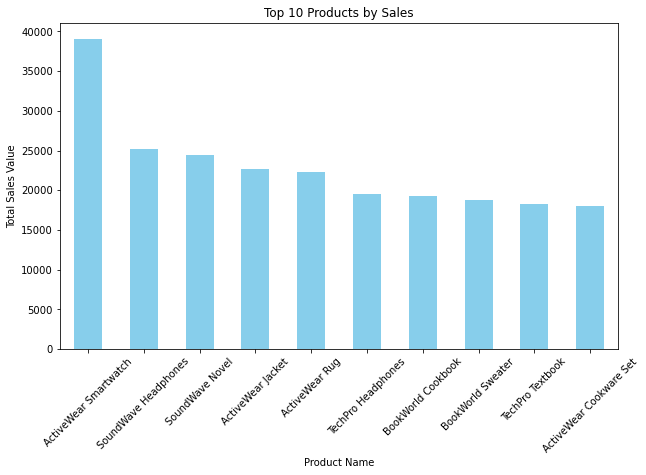

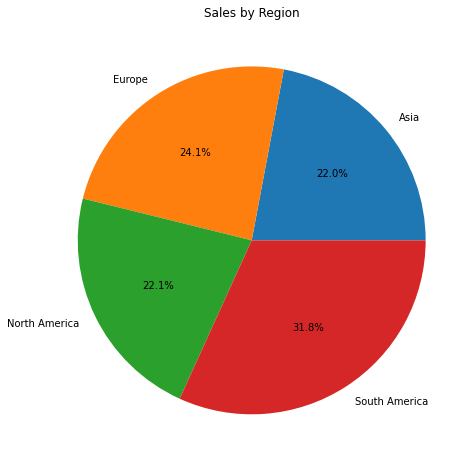

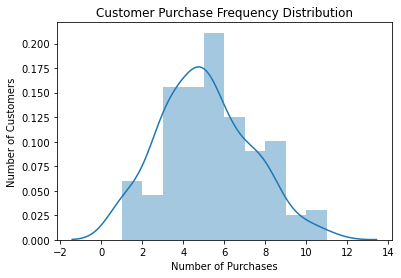

In [45]:
# Merge datasets
transactions_products = pd.merge(transactions, products, on='ProductID')
merged_data = pd.merge(transactions_products, customers, on='CustomerID')

# Top products by sales
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top 10 Products by Sales', figsize=(10, 6), color='skyblue')
plt.ylabel('Total Sales Value')
plt.xlabel('Product Name')
plt.xticks(rotation=45)
plt.show()

# Regional sales
regional_sales = merged_data.groupby('Region')['TotalValue'].sum()
regional_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Sales by Region')
plt.ylabel('')
plt.show()

# Customer purchase frequency
customer_freq = merged_data['CustomerID'].value_counts()
sns.distplot(customer_freq, bins=10, kde=True, hist=True)
plt.title('Customer Purchase Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()
